In [1]:
%matplotlib inline

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

import utils

sns.set_context("notebook", font_scale=1.5)
plt.rcParams['figure.figsize'] = (17, 5)

# Reading the data from FMA

In [70]:
#tracks = utils.load('tracks.csv')
#genres = utils.load('genres.csv')
#features = utils.load('features.csv')
#echonest = utils.load('echonest.csv')

tracks = pd.read_csv('tracks.csv')
genres = pd.read_csv('genres.csv')
features = pd.read_csv('features.csv')
echonest = pd.read_csv('echonest.csv')

#np.testing.assert_array_equal(features.index, tracks.index)
#assert echonest.index.isin(tracks.index).all()

#tracks.shape, genres.shape, features.shape, echonest.shape

C:\Users\anast\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\anast\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177

# Preproccessing

In [71]:
tracklist=tracks.loc[0,:]
tracks.columns=tracklist
tracks=tracks.loc[2:,:]
tracks.rename(columns={tracks.columns[0]: "track_id"}, inplace=True)
echonest.rename(columns={echonest.columns[0]: "track_id"}, inplace=True)
features.rename(columns={features.columns[0]: "track_id"}, inplace=True)

In [73]:
listft=features.loc[0,:]=='mean'
listft['track_id']=True
listft=features.loc[0,listft]
desired_feat=features.loc[:,listft.index]
desired_feat=desired_feat.loc[3:,:]
desired_feat=desired_feat.drop(desired_feat.loc[:,'chroma_cens.24':'chroma_stft.35'],axis=1)

In [75]:
listecho=echonest.loc[1,:]
listecho[0]='track_id'
echo=echonest.loc[3:,:]
echo.columns=listecho

In [83]:
clean_tracks = tracks[['track_id',"genre_top"]] 
clean_tracks.drop(clean_tracks.index[0], inplace=True)

# Do you want merge with features? Uncomment the next line
clean_tracks = clean_tracks.merge(desired_feat,on="track_id",how="inner")
# Here we have at least 1000 songs "Classical" if you choose to merge
frequencies = clean_tracks['genre_top'].value_counts()
print("1st step :\n",frequencies)  
# Do you want merge with echonest? Uncomment the next line 
# clean_tracks = clean_tracks.merge(echonest,on="track_id",how="inner")
 
frequencies = clean_tracks['genre_top'].value_counts()
print("2nd step :\n",frequencies) 
     
clean_tracks= clean_tracks.sample(frac=1).reset_index(drop=True)
     
#  selected_genres :
# 'Pop','Rock','Hip-Hop','Classical'
max_tracks_each_genre = 1000 # choose how many songs you will 
classical = clean_tracks[clean_tracks['genre_top'] == 'Classical'].head(max_tracks_each_genre)
rock = clean_tracks[clean_tracks['genre_top'] == 'Rock'].head(max_tracks_each_genre)
hip_hop = clean_tracks[clean_tracks['genre_top'] == 'Hip-Hop'].head(max_tracks_each_genre)
pop = clean_tracks[clean_tracks['genre_top'] == 'Pop'].head(max_tracks_each_genre)
# append each to our final dataset 
     
final_dataset = pd.DataFrame()
final_dataset = final_dataset.append([classical,hip_hop,rock,pop])
final_dataset = final_dataset.drop('track_id',axis=1)

y=final_dataset['genre_top']
X=final_dataset.drop('genre_top',axis=1)

final_dataset.columns

1st step :
 Rock                   11127
Experimental            9072
Electronic              7718
Hip-Hop                 2991
Folk                    2141
Pop                     1994
Instrumental            1936
International           1128
Classical               1039
Jazz                     385
Spoken                   344
Old-Time / Historic      215
Soul-RnB                 157
Country                  103
Blues                     58
Easy Listening            23
Name: genre_top, dtype: int64
2nd step :
 Rock                   11127
Experimental            9072
Electronic              7718
Hip-Hop                 2991
Folk                    2141
Pop                     1994
Instrumental            1936
International           1128
Classical               1039
Jazz                     385
Spoken                   344
Old-Time / Historic      215
Soul-RnB                 157
Country                  103
Blues                     58
Easy Listening            23
Name: genre_top, d

Index(['genre_top', 'mfcc.40', 'mfcc.41', 'mfcc.42', 'mfcc.43', 'mfcc.44',
       'mfcc.45', 'mfcc.46', 'mfcc.47', 'mfcc.48', 'mfcc.49', 'mfcc.50',
       'mfcc.51', 'mfcc.52', 'mfcc.53', 'mfcc.54', 'mfcc.55', 'mfcc.56',
       'mfcc.57', 'mfcc.58', 'mfcc.59', 'rmse.2', 'spectral_bandwidth.2',
       'spectral_centroid.2', 'spectral_contrast.14', 'spectral_contrast.15',
       'spectral_contrast.16', 'spectral_contrast.17', 'spectral_contrast.18',
       'spectral_contrast.19', 'spectral_contrast.20', 'spectral_rolloff.2',
       'tonnetz.12', 'tonnetz.13', 'tonnetz.14', 'tonnetz.15', 'tonnetz.16',
       'tonnetz.17', 'zcr.2'],
      dtype='object')

# Feature Selection

[0.05663564 0.03103996 0.03321907 0.02159021 0.01817924 0.0209481
 0.01855042 0.01668956 0.01799903 0.02429564 0.01900859 0.01813079
 0.01630917 0.01869966 0.01852106 0.02310127 0.02028122 0.03254158
 0.02053084 0.02215478 0.06528776 0.03871138 0.02402714 0.01985627
 0.03444173 0.03716582 0.06429034 0.04512902 0.01927894 0.03873554
 0.02989506 0.01763464 0.0183026  0.01516923 0.01489806 0.01416587
 0.01533238 0.01925242]


C:\Users\anast\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


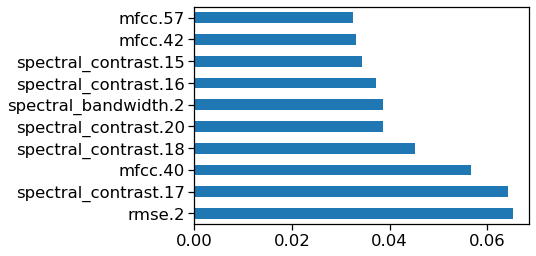

In [84]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# We see that mfcc and spectral_contrast seems to have a great impact on classification so we drop some features

In [86]:
X=X.drop(X.loc[:,'spectral_rolloff.2':],axis=1)
X.columns

Index(['mfcc.40', 'mfcc.41', 'mfcc.42', 'mfcc.43', 'mfcc.44', 'mfcc.45',
       'mfcc.46', 'mfcc.47', 'mfcc.48', 'mfcc.49', 'mfcc.50', 'mfcc.51',
       'mfcc.52', 'mfcc.53', 'mfcc.54', 'mfcc.55', 'mfcc.56', 'mfcc.57',
       'mfcc.58', 'mfcc.59', 'rmse.2', 'spectral_bandwidth.2',
       'spectral_centroid.2', 'spectral_contrast.14', 'spectral_contrast.15',
       'spectral_contrast.16', 'spectral_contrast.17', 'spectral_contrast.18',
       'spectral_contrast.19', 'spectral_contrast.20'],
      dtype='object')

# Classifiers

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores = cross_val_score(clf, X, y, cv=10)
print(scores.mean())

clf = ExtraTreesClassifier(n_estimators=50, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=20)
scores.mean()

0.6242500000000001


0.7367499999999999

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

Accuracy: 0.71 (+/- 0.01) [Logistic Regression]
Accuracy: 0.72 (+/- 0.01) [Random Forest]
Accuracy: 0.68 (+/- 0.02) [naive Bayes]


C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

Accuracy: 0.72 (+/- 0.00) [Ensemble]


# Dataset with echonest and features 

In [68]:
echo_test=echo.loc[:,:'valence']
echo_test=echo_test.merge(tracks[['track_id','genre_top']],on='track_id',how='inner')
echo_test=echo_test.merge(desired_feat,on='track_id',how='inner')
echo_test['genre_top'].value_counts()

Rock                   2085
Electronic             1186
Hip-Hop                 422
Folk                    382
Pop                     212
Jazz                    143
Classical               105
International            64
Old-Time / Historic      62
Instrumental             48
Blues                    17
Experimental             17
Name: genre_top, dtype: int64

In [54]:
y=echo_test['genre_top']
X=echo_test.loc[:,'acousticness':]